<a href="https://colab.research.google.com/github/SameerSri72/Sarvam_Assignment/blob/main/Sarvam_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

Downloading the embeddings

**Very Important** <br>
If the below block throws error after execution. just go to Runtime --> Restart session <br>
After Restarting the session Run the first (above) block again and then the run the block below, It will work.

In [2]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
import os

Step 1: Download Pre-trained FastText Embeddings

In [3]:
# --- Configuration ---
top_k = 100000
en_vec_url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec'
hi_vec_url = 'https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.hi.vec'
en_vec_file = 'wiki.en.vec'
hi_vec_file = 'wiki.hi.vec'


In [4]:
def download_file(url, filename):
    if not os.path.exists(filename):
        print(f"Downloading {filename}...")
        !wget -O {filename} {url}
        print(f"Finished downloading {filename}.")
    else:
        print(f"{filename} already exists. Skipping download.")

# --- Function to load embeddings using gensim ---
def load_top_embeddings_gensim(filepath, limit_num):
    print(f"Loading top {limit_num} embeddings from {filepath} using gensim...")
    # binary=False because .vec files are text format
    # no_header=False because standard .vec files have a header line
    wv = KeyedVectors.load_word2vec_format(filepath, binary=False, limit=limit_num, no_header=False)
    print(f"Loaded {len(wv.index_to_key)} words.")
    return wv

In [5]:

download_file(en_vec_url, en_vec_file)
download_file(hi_vec_url, hi_vec_file)

# Load the top K embeddings using gensim
try:
    print("\nLoading English embeddings...")
    en_embeddings_kv = load_top_embeddings_gensim(en_vec_file, top_k)
    print("English embeddings loaded.")

    print("\nLoading Hindi embeddings...")
    hi_embeddings_kv = load_top_embeddings_gensim(hi_vec_file, top_k)
    print("Hindi embeddings loaded.")

except Exception as e:
    print(f"An error occurred during loading: {e}")


--2025-04-05 14:07:59--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.111, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G  88.8MB/s    in 43s     

2025-04-05 14:08:42 (145 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]

Finished downloading wiki.en.vec.
--2025-04-05 14:08:42--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.hi.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.78, 13.226.210.111, 13.226.210.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416644179 (397M) [binary/octet-stream]


In [6]:
if 'en_embeddings_kv' in locals():
    print(f"\nSample English word 'the' vector dimension: {en_embeddings_kv['the'].shape}")
    # Check a word known to be frequent
    print(f"'king' in English embeddings: {'king' in en_embeddings_kv}") # Use direct key check
    print(f"Vocabulary size (English): {len(en_embeddings_kv.index_to_key)}") # gensim >= 4.0


Sample English word 'the' vector dimension: (300,)
'king' in English embeddings: True
Vocabulary size (English): 100000


In [8]:
if 'hi_embeddings_kv' in locals():
    # Sample Hindi word (ensure it's likely in top 100k) - 'और' means 'and'
    hindi_test_word = 'और'
    if hindi_test_word in hi_embeddings_kv:
         print(f"Sample Hindi word '{hindi_test_word}' vector dimension: {hi_embeddings_kv[hindi_test_word].shape}")
    else:
         print(f"Sample Hindi word '{hindi_test_word}' not found in top {top_k} embeddings.")
    print(f"Vocabulary size (Hindi): {len(hi_embeddings_kv.index_to_key)}") # gensim >= 4.0

Sample Hindi word 'और' vector dimension: (300,)
Vocabulary size (Hindi): 100000


In [9]:
#  Download the bilingual dictionaries archive using wget
!wget https://dl.fbaipublicfiles.com/arrival/dictionaries.tar.gz -O dictionaries.tar.gz


--2025-04-05 14:11:22--  https://dl.fbaipublicfiles.com/arrival/dictionaries.tar.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.111, 13.226.210.15, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62097248 (59M) [application/gzip]
Saving to: ‘dictionaries.tar.gz’

dictionaries.tar.gz 100%[===================>]  59.22M  66.5MB/s    in 0.9s    

2025-04-05 14:11:23 (66.5 MB/s) - ‘dictionaries.tar.gz’ saved [62097248/62097248]



In [11]:
# Extract the downloaded tar.gz file
!tar -xzvf dictionaries.tar.gz


dictionaries/
dictionaries/OPUS_en_it_europarl_test.txt
dictionaries/OPUS_en_it_europarl_train_5K.txt
dictionaries/af-en.0-5000.txt
dictionaries/af-en.5000-6500.txt
dictionaries/af-en.txt
dictionaries/ar-en.0-5000.txt
dictionaries/ar-en.5000-6500.txt
dictionaries/ar-en.txt
dictionaries/bg-en.0-5000.txt
dictionaries/bg-en.5000-6500.txt
dictionaries/bg-en.txt
dictionaries/bn-en.0-5000.txt
dictionaries/bn-en.5000-6500.txt
dictionaries/bn-en.txt
dictionaries/bs-en.0-5000.txt
dictionaries/bs-en.5000-6500.txt
dictionaries/bs-en.txt
dictionaries/ca-en.0-5000.txt
dictionaries/ca-en.5000-6500.txt
dictionaries/ca-en.txt
dictionaries/cs-en.0-5000.txt
dictionaries/cs-en.5000-6500.txt
dictionaries/cs-en.txt
dictionaries/da-en.0-5000.txt
dictionaries/da-en.5000-6500.txt
dictionaries/da-en.txt
dictionaries/de-en.0-5000.txt
dictionaries/de-en.5000-6500.txt
dictionaries/de-en.txt
dictionaries/de-es.0-5000.txt
dictionaries/de-es.5000-6500.txt
dictionaries/de-es.txt
dictionaries/de-fr.0-5000.txt
dictiona

In [12]:
# List the extracted files to see the folder structure
!ls -R


.:
dictionaries  dictionaries.tar.gz  sample_data	wiki.en.vec  wiki.hi.vec

./dictionaries:
af-en.0-5000.txt	en-lv.0-5000.txt      hr-en.5000-6500.txt
af-en.5000-6500.txt	en-lv.5000-6500.txt   hr-en.txt
af-en.txt		en-lv.txt	      hu-en.0-5000.txt
ar-en.0-5000.txt	en-mk.0-5000.txt      hu-en.5000-6500.txt
ar-en.5000-6500.txt	en-mk.5000-6500.txt   hu-en.txt
ar-en.txt		en-mk.txt	      id-en.0-5000.txt
bg-en.0-5000.txt	en-ms.0-5000.txt      id-en.5000-6500.txt
bg-en.5000-6500.txt	en-ms.5000-6500.txt   id-en.txt
bg-en.txt		en-ms.txt	      it-de.0-5000.txt
bn-en.0-5000.txt	en-nl.0-5000.txt      it-de.5000-6500.txt
bn-en.5000-6500.txt	en-nl.5000-6500.txt   it-de.txt
bn-en.txt		en-nl.txt	      it-en.0-5000.txt
bs-en.0-5000.txt	en-no.0-5000.txt      it-en.5000-6500.txt
bs-en.5000-6500.txt	en-no.5000-6500.txt   it-en.txt
bs-en.txt		en-no.txt	      it-es.0-5000.txt
ca-en.0-5000.txt	en-pl.0-5000.txt      it-es.5000-6500.txt
ca-en.5000-6500.txt	en-pl.5000-6500.txt   it-es.txt
ca-en.txt		en-pl.txt	 

In [13]:
# Load and display the first few lines of the English-Hindi training dictionary

dictionary_path = 'dictionaries/hi-en.0-5000.txt'

with open(dictionary_path, 'r', encoding='utf-8') as f:
    for _ in range(10):
        line = f.readline().strip()
        if line:
            print(line)


के	of
में	in
की	of
की	ki
का	of
का	ka
और	and
से	sy
से	from
है	hai


In [14]:
train_dict_file = 'dictionaries/en-hi.0-5000.txt'
test_dict_file = 'dictionaries/en-hi.5000-6500.txt'

In [15]:
def load_and_filter_dictionary_gensim(filepath, en_kv, hi_kv):
    """Loads translation pairs and keeps only those present in both keyed vectors."""
    pairs = []
    print(f"Loading and filtering dictionary from {filepath}...")
    # Check if file exists before trying to open
    if not os.path.exists(filepath):
         print(f"ERROR: Cannot find file {filepath}")
         return pairs # Return empty list

    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                en_word, hi_word = line.strip().split()
                # Check if both words are in the loaded KeyedVectors objects
                if en_word in en_kv and hi_word in hi_kv:
                    pairs.append((en_word, hi_word))
            except ValueError:
                print(f"Skipping malformed line: {line.strip()}") # Handle potential empty or bad lines

    print(f"Loaded {len(pairs)} valid translation pairs.")
    return pairs

# --- Usage ---

if 'en_embeddings_kv' in locals() and 'hi_embeddings_kv' in locals():
    train_dictionary = load_and_filter_dictionary_gensim(train_dict_file, en_embeddings_kv, hi_embeddings_kv)
    test_dictionary = load_and_filter_dictionary_gensim(test_dict_file, en_embeddings_kv, hi_embeddings_kv)

    # Example: Print the first 5 pairs from the training dictionary
    if train_dictionary: # Check if list is not empty
         print("\nFirst 5 training pairs:")
         print(train_dictionary[:5])
    else:
         print("\nTraining dictionary is empty or failed to load.")


    # Example: Print the first 5 pairs from the test dictionary
    if test_dictionary: # Check if list is not empty
         print("\nFirst 5 test pairs:")
         print(test_dictionary[:5])
    else:
         print("\nTest dictionary is empty or failed to load.")

else:
    print("\nError: Embeddings (en_embeddings_kv or hi_embeddings_kv) were not loaded successfully.")

Loading and filtering dictionary from dictionaries/en-hi.0-5000.txt...
Loaded 8600 valid translation pairs.
Loading and filtering dictionary from dictionaries/en-hi.5000-6500.txt...
Loaded 1966 valid translation pairs.

First 5 training pairs:
[('and', 'और'), ('was', 'था'), ('was', 'थी'), ('for', 'लिये'), ('that', 'उस')]

First 5 test pairs:
[('baroque', 'बरॉक'), ('iso', 'आईएसओ'), ('integral', 'इंटीग्रल'), ('integral', 'अभिन्न'), ('jake', 'jake')]


***********************

Step 3: Embedding Alignment

1. Gather Examples: We take our train_dictionary. For each pair like ('cat', 'बिल्ली'), we get the vector for 'cat' (let's call it x_cat) and the vector for 'बिल्ली' (let's call it y_billi).

2. Build Matrices: We stack all the English vectors (x) from the training pairs into a big matrix X. We stack all the corresponding Hindi vectors (y) into a matrix Y. Each row in X corresponds to the same row in Y.

  X = [ vector for 'cat' ]
[ vector for 'dog' ]
[ ... ]

  Y = [ vector for 'बिल्ली' ]
[ vector for 'कुत्ता' ]
[ ... ]

3. Find Best Rotation: The Procrustes method finds the best orthogonal matrix W that minimizes the overall difference between X multiplied by W (the transformed English vectors) and Y (the target Hindi vectors). This involves:

  Calculating a matrix M = X^T * Y (where T means transpose). This matrix captures the correlations between the dimensions of the English and Hindi spaces based on our dictionary.

  Using a powerful technique called Singular Value Decomposition (SVD) on M. SVD breaks M down into three other matrices: M = U * S * V^T. U and V are orthogonal matrices themselves!

The optimal alignment matrix W is simply W = U * V^T.

In [16]:
import numpy as np

def get_procrustes_mapping(en_kv, hi_kv, dictionary):
    """
    Learns the orthogonal mapping matrix W using the Procrustes method.

    Args:
        en_kv: Gensim KeyedVectors object for English embeddings.
        hi_kv: Gensim KeyedVectors object for Hindi embeddings.
        dictionary: List of (en_word, hi_word) training pairs.

    Returns:
        W: The orthogonal mapping matrix (numpy array).
    """
    print(f"Building matrices X and Y from {len(dictionary)} dictionary pairs...")

    # Get embedding dimension
    embed_dim = en_kv.vector_size

    # Initialize X and Y matrices (num_pairs x embedding_dim)
    num_pairs = len(dictionary)
    X = np.zeros((num_pairs, embed_dim))
    Y = np.zeros((num_pairs, embed_dim))

    # Fill X and Y
    for i, (en_word, hi_word) in enumerate(dictionary):
        X[i, :] = en_kv[en_word]
        Y[i, :] = hi_kv[hi_word]

    print("Matrices X and Y built.")

    # --- Procrustes Alignment ---

    # 1. Center the matrices
    # Subtract the mean vector (average embedding) from each row
    X_mean = np.mean(X, axis=0)
    Y_mean = np.mean(Y, axis=0)
    X_centered = X - X_mean
    Y_centered = Y - Y_mean
    print("Matrices centered.")

    # 2. Calculate M = X_centered^T * Y_centered
    print("Calculating M = X^T * Y...")
    M = X_centered.T.dot(Y_centered)

    # 3. Perform SVD on M: M = U * S * V^T
    print("Performing SVD on M...")
    # Note: np.linalg.svd returns U, S (singular values), and V^T (already transposed)
    U, S, VT = np.linalg.svd(M)
    print("SVD complete.")

    # 4. Calculate W = U * V^T
    # Note that VT from np.linalg.svd is already V^T
    W = U.dot(VT)
    print("Orthogonal mapping matrix W calculated.")

    return W

# --- Usage ---
if 'en_embeddings_kv' in locals() and 'hi_embeddings_kv' in locals() and 'train_dictionary' in locals() and train_dictionary:
    # Learn the mapping using the training dictionary
    W_mapping = get_procrustes_mapping(en_embeddings_kv, hi_embeddings_kv, train_dictionary)

    # Check the shape of W (should be embedding_dim x embedding_dim, e.g., 300x300)
    print(f"\nShape of the learned mapping matrix W: {W_mapping.shape}")

    # Check if W is (close to) orthogonal
    # W^T * W should be close to the Identity matrix I
    identity_check = np.dot(W_mapping.T, W_mapping)
    identity_matrix = np.identity(W_mapping.shape[0])
    # Check how close it is using the Frobenius norm of the difference
    orthogonality_error = np.linalg.norm(identity_check - identity_matrix, 'fro')
    print(f"Orthogonality check (||W^T*W - I||_F): {orthogonality_error}")
    # This value should be very small (close to zero) if W is orthogonal.

else:
    print("Error: Cannot perform alignment. Ensure embeddings and training dictionary are loaded.")

Building matrices X and Y from 8600 dictionary pairs...
Matrices X and Y built.
Matrices centered.
Calculating M = X^T * Y...
Performing SVD on M...
SVD complete.
Orthogonal mapping matrix W calculated.

Shape of the learned mapping matrix W: (300, 300)
Orthogonality check (||W^T*W - I||_F): 6.353305597150776e-14


Step 4. Word Translation (EN->HI) and Precision Evaluation (P@1, P@5)

In [17]:
import numpy as np
from scipy.spatial.distance import cosine

# --- Helper function for Cosine Similarity ---.
def cosine_similarity(vec1, vec2):
    """Calculates cosine similarity between two vectors."""
    # Ensure vectors are not zero vectors to avoid division by zero
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return np.dot(vec1, vec2) / (norm1 * norm2)

# --- Function to perform translation and calculate precision ---
def calculate_precision(en_kv, hi_kv, W, test_dict, k_values=[1, 5]):
    """
    Translates English words to Hindi using the mapping W and evaluates precision.

    Args:
        en_kv: Gensim KeyedVectors for English.
        hi_kv: Gensim KeyedVectors for Hindi.
        W: The learned mapping matrix.
        test_dict: List of (en_word, true_hi_word) pairs for evaluation.
        k_values: List of integers for which to calculate P@k (e.g., [1, 5]).

    Returns:
        precision_scores: A dictionary {k: precision_at_k}.
    """
    if not test_dict:
        print("Warning: Test dictionary is empty. Cannot calculate precision.")
        return {k: 0.0 for k in k_values}

    print(f"Evaluating precision on {len(test_dict)} test pairs...")
    max_k = max(k_values)
    correct_counts = {k: 0 for k in k_values}
    total_words = 0

    for en_word, true_hi_word in test_dict:
        if en_word not in en_kv:
            continue
        if true_hi_word not in hi_kv:
            continue

        total_words += 1

        # 1. Get the English vector
        v_en = en_kv[en_word]

        # 2. Map it to the Hindi space using W
        v_en_mapped = v_en.dot(W)
        # v_en_mapped is now the "predicted" vector for the Hindi translation

        # 3. Find the k closest Hindi words in hi_kv to the mapped vector
        # `most_similar` finds words with highest cosine similarity to the given vector.
        # `positive=[vector]` is the way to pass the vector you want to find neighbors for.
        # It returns a list of (word, similarity_score) tuples, sorted by similarity.
        try:
             # Use the full Hindi vocabulary for searching
             most_similar_hi = hi_kv.most_similar(positive=[v_en_mapped], topn=max_k)
        except Exception as e:
            print(f"Error during most_similar for {en_word}: {e}")
            continue # Skip this word if similarity search fails


        # 4. Check if the true translation is among the top k results
        retrieved_words = [word for word, score in most_similar_hi]

        for k in k_values:
            if true_hi_word in retrieved_words[:k]:
                correct_counts[k] += 1

    # Calculate precision
    precision_scores = {}
    if total_words == 0:
         print("Warning: No valid words found in the test set for evaluation.")
         return {k: 0.0 for k in k_values}

    for k in k_values:
        precision_scores[k] = correct_counts[k] / total_words

    print("Evaluation complete.")
    return precision_scores

# --- Usage ---

if 'W_mapping' in locals() and 'test_dictionary' in locals():
    print("\n--- Evaluating Word Translation Accuracy ---")
    precision_results = calculate_precision(
        en_embeddings_kv,
        hi_embeddings_kv,
        W_mapping,
        test_dictionary,
        k_values=[1, 5] # We want P@1 and P@5
    )

    if precision_results:
        print(f"Precision@1 (P@1): {precision_results.get(1, 0.0):.4f}")
        print(f"Precision@5 (P@5): {precision_results.get(5, 0.0):.4f}")
else:
    print("Error: Cannot evaluate. Ensure embeddings, W_mapping, and test_dictionary are available.")


--- Evaluating Word Translation Accuracy ---
Evaluating precision on 1966 test pairs...
Evaluation complete.
Precision@1 (P@1): 0.2030
Precision@5 (P@5): 0.3632


Compute and Analyze Cosine Similarities

In [18]:
import random

# --- Usage ---
if 'W_mapping' in locals() and 'test_dictionary' in locals() and test_dictionary:
    print("\n--- Analyzing Cosine Similarities ---")

    # Select a few sample pairs from the test dictionary
    num_samples = 5
    if len(test_dictionary) < num_samples:
        sample_pairs = test_dictionary
    else:
        sample_pairs = random.sample(test_dictionary, num_samples)

    # Get a few random Hindi words (that are NOT translations in our sample)
    # to show lower similarity
    all_hi_words = list(hi_embeddings_kv.index_to_key) # Get all Hindi words we loaded
    random_hi_words = []
    sample_hi_translations = {pair[1] for pair in sample_pairs} # Set of true Hindi translations in our sample
    while len(random_hi_words) < num_samples:
        rand_word = random.choice(all_hi_words)
        # Ensure it's not one of the true translations we are checking
        if rand_word not in sample_hi_translations and rand_word not in random_hi_words:
            random_hi_words.append(rand_word)

    print("Comparing mapped English vector vs. true Hindi vector:")
    for i, (en_word, true_hi_word) in enumerate(sample_pairs):
        if en_word in en_embeddings_kv and true_hi_word in hi_embeddings_kv:
            v_en = en_embeddings_kv[en_word]
            v_hi_true = hi_embeddings_kv[true_hi_word]
            v_en_mapped = v_en.dot(W_mapping)

            sim_true = cosine_similarity(v_en_mapped, v_hi_true)
            print(f"  Pair: ('{en_word}', '{true_hi_word}') -> Similarity: {sim_true:.4f}")

            # Compare with a random Hindi word
            if i < len(random_hi_words):
                v_hi_random = hi_embeddings_kv[random_hi_words[i]]
                sim_random = cosine_similarity(v_en_mapped, v_hi_random)
                print(f"      vs. Random ('{random_hi_words[i]}') -> Similarity: {sim_random:.4f}")

else:
    print("Error: Cannot analyze similarities. Ensure embeddings, W_mapping, and test_dictionary are available.")


--- Analyzing Cosine Similarities ---
Comparing mapped English vector vs. true Hindi vector:
  Pair: ('voluntary', 'voluntary') -> Similarity: 0.2427
      vs. Random ('जांतव') -> Similarity: 0.0452
  Pair: ('sad', 'दुखद') -> Similarity: 0.2292
      vs. Random ('देवप्रयाग') -> Similarity: 0.0404
  Pair: ('bits', 'बिट्स') -> Similarity: 0.3541
      vs. Random ('प्राधान्य') -> Similarity: 0.0770
  Pair: ('silence', 'खामोशी') -> Similarity: 0.3062
      vs. Random ('assuming') -> Similarity: 0.0427
  Pair: ('tracy', 'ट्रेसी') -> Similarity: 0.2580
      vs. Random ('तेल') -> Similarity: 0.0341


Ablation study


--- Ablation Study: Impact of Training Dictionary Size ---

Training with 1000 dictionary pairs...
Building matrices X and Y from 1000 dictionary pairs...
Matrices X and Y built.
Matrices centered.
Calculating M = X^T * Y...
Performing SVD on M...
SVD complete.
Orthogonal mapping matrix W calculated.
Training took 0.17 seconds.
Evaluating W trained on 1000 pairs...
Evaluating precision on 1966 test pairs...
Evaluation complete.
Results for size 1000: P@1=0.0677, P@5=0.1724

Training with 2000 dictionary pairs...
Building matrices X and Y from 2000 dictionary pairs...
Matrices X and Y built.
Matrices centered.
Calculating M = X^T * Y...
Performing SVD on M...
SVD complete.
Orthogonal mapping matrix W calculated.
Training took 0.11 seconds.
Evaluating W trained on 2000 pairs...
Evaluating precision on 1966 test pairs...
Evaluation complete.
Results for size 2000: P@1=0.1302, P@5=0.2762

Training with 3000 dictionary pairs...
Building matrices X and Y from 3000 dictionary pairs...
Matric

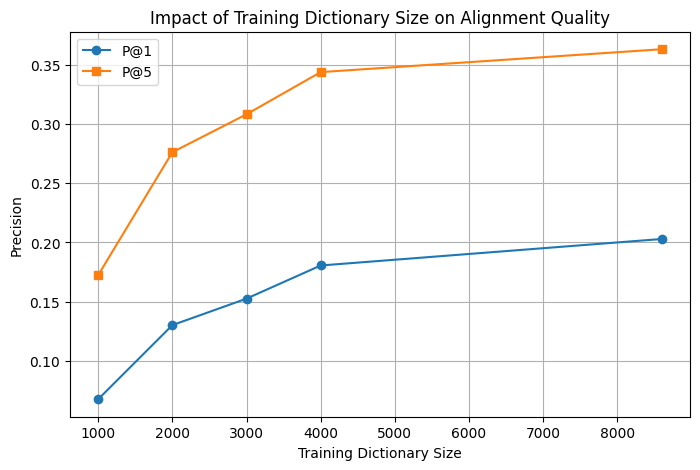

In [19]:
import time

# --- Usage ---

if ('en_embeddings_kv' in locals() and
    'hi_embeddings_kv' in locals() and
    'train_dictionary' in locals() and train_dictionary and
    'test_dictionary' in locals() and test_dictionary):

    print("\n--- Ablation Study: Impact of Training Dictionary Size ---")

    full_train_size = len(train_dictionary)
    ablation_sizes = [1000, 2000, 3000, 4000, full_train_size]
    ablation_sizes = sorted([s for s in ablation_sizes if s <= full_train_size])

    ablation_results = {}

    for size in ablation_sizes:
        print(f"\nTraining with {size} dictionary pairs...")
        start_time = time.time()

        # 1. Create the subset of the training dictionary
        train_subset = train_dictionary[:size] # Take the first 'size' pairs

        # 2. Re-learn the mapping W using THIS subset
        W_ablated = get_procrustes_mapping(
            en_embeddings_kv,
            hi_embeddings_kv,
            train_subset
        )
        end_time = time.time()
        training_time = end_time - start_time
        print(f"Training took {training_time:.2f} seconds.")

        # 3. Evaluate this W_ablated on the FULL test dictionary
        print(f"Evaluating W trained on {size} pairs...")
        precision_ablated = calculate_precision(
            en_embeddings_kv,
            hi_embeddings_kv,
            W_ablated,
            test_dictionary, # Always evaluate on the same test set
            k_values=[1, 5]
        )

        # 4. Store the results
        ablation_results[size] = precision_ablated
        print(f"Results for size {size}: P@1={precision_ablated.get(1, 0.0):.4f}, P@5={precision_ablated.get(5, 0.0):.4f}")


    # --- Print Summary of Ablation Study ---
    print("\n--- Ablation Study Summary ---")
    print("Train Size | P@1    | P@5")
    print("-----------|--------|--------")
    for size in sorted(ablation_results.keys()):
        p1 = ablation_results[size].get(1, 0.0)
        p5 = ablation_results[size].get(5, 0.0)
        print(f"{size:<10} | {p1:.4f} | {p5:.4f}")

    # Plotting the results
    try:
        import matplotlib.pyplot as plt
        sizes = sorted(ablation_results.keys())
        p1_scores = [ablation_results[s].get(1, 0.0) for s in sizes]
        p5_scores = [ablation_results[s].get(5, 0.0) for s in sizes]

        plt.figure(figsize=(8, 5))
        plt.plot(sizes, p1_scores, marker='o', label='P@1')
        plt.plot(sizes, p5_scores, marker='s', label='P@5')
        plt.xlabel("Training Dictionary Size")
        plt.ylabel("Precision")
        plt.title("Impact of Training Dictionary Size on Alignment Quality")
        plt.legend()
        plt.grid(True)
        plt.show()
    except ImportError:
        print("\nInstall matplotlib (`!pip install matplotlib`) to see the plot.")

else:
     print("\nError: Cannot run ablation study. Missing required data (embeddings, dictionaries).")